# **Exercise 2: Logistic Regression**

Here we will build a logistic regression model to predict whether a student gets admitted into a university. We aim at determining the chance of admission of each student based on their results on two exams. For each training example, we have the scores on two exams and the admissions decision. Our final model also aims to estimate the probability of admission based the scores from those two exams.





## **Step 1: Importing and plotting the dataset**

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#mount google drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#import dataset
df =pd.read_csv("drive/My Drive/Colab Notebooks/Lab2_dataset1.csv")
df.columns = ['exam_score_1', 'exam_score_2', 'label']
df.head()

,exam_score_1,exam_score_2,label
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [50]:
# explore dataset
df.shape


(99, 3)

The dataset has 99 rows and 3 columns.

The Features are:

*   exam_score_1: The final mark for exam 1.

*   exam_score_2: The final mark for exam 2.

The outcome is:
*   label: admitted (1) / not admitted (0)

In [51]:
# check null data
df.isnull().sum()

exam_score_1    0
exam_score_2    0
label           0
dtype: int64

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
exam_score_1,99.0,65.957614,19.302009,30.058822,51.297736,67.319257,80.234877,99.827858
exam_score_2,99.0,66.102779,18.638875,30.603263,47.978125,66.589353,79.876423,98.869436
label,99.0,0.606061,0.491108,0.000000,0.000000,1.000000,1.000000,1.000000


Visualization of the samples on the plane of the features. The label is encoded by different colors.

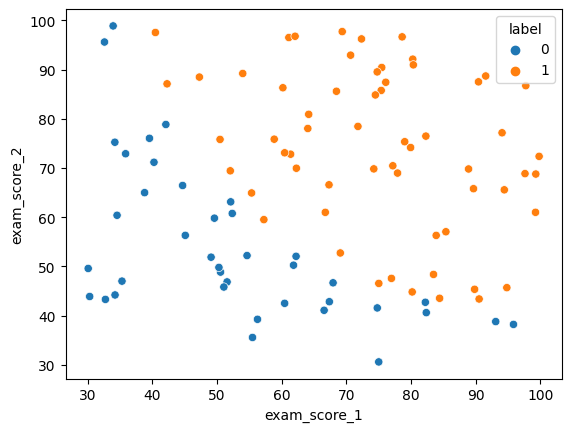

In [53]:
pl=sns.scatterplot(data=df, x="exam_score_1", y="exam_score_2", hue='label')

plt.show(pl)



## **Step 2: Splitting data**

In [54]:
import math
s_f=0.8
n_train = math.floor(s_f * df.shape[0])
n_test = math.ceil((1-s_f) * df.shape[0])
print(n_train,n_test)

df_train = df[:n_train]
df_test = df[n_train:]
df_train.head()

79 20


,exam_score_1,exam_score_2,label
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


## **Step 3: Model Implementation**

We need to train the logistic regression to the dataset using gradient descent.

#### - ***Logistic regression hypothesis***


$$h_\theta(x) = g(\theta^Tx)$$

$$g(z) = \frac{1}{1+e^{-z}}$$

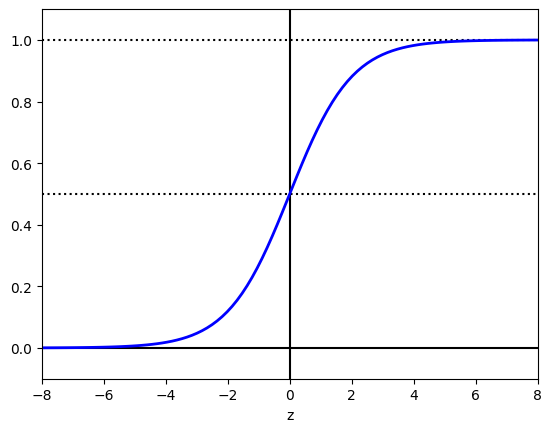

In [55]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+np.exp(-z))

%matplotlib inline
z = np.linspace(-8, 8, 100)
sig = sigmoid(z)

plt.plot([-8, 8], [0, 0], "k-")
plt.plot([-8, 8], [0.5, 0.5], "k:")
plt.plot([-8, 8], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-8, 8, -0.1, 1.1])
plt.show()



#### - ***Cost function***

The cost function for logistic regression is:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^i log(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$

The vectorized implementation:

$h = g(X\theta)$

$J(\theta) = \frac{1}{m}(-y^T log(h)-(1-y)^Tlog(1-h))$



The gradient of the cost is a vector of the same length as $\theta$ where $j^{th}$ element (for $j=0,1,...,n$) is defined as follows:

$$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m ((h_\theta(x^i) - y^i) \cdot x_j^i)$$

Vectorized:
$\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (g(X\theta)-y)$


In [56]:
def cost_function(X, y, theta):
    epsilon = 1e-5
    m = y.shape[0]

    h = sigmoid(X.dot(theta))
    h=h.reshape(-1,1)
    J = (1/m) * (-y.T.dot(np.log(h+epsilon)) - (1-y).T.dot(np.log(1-h+epsilon)))

    return J


In [57]:
# Gradient Descent function to minimize the Logistic Regression Cost Function.
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        # call sigmoid function
        h = sigmoid(X.dot(theta))
        h=h.reshape(-1,1)
        # calculate error
        diff_hy = h - y
        # calculate gradient
        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = cost_function(X, y, theta)


    return theta, J_history


#### - ***Preparing data***

We need to add another dimension to our data to accommodate the $\theta_0$ intercept term. This allows us to treat $\theta_0$ as simply another feature.



In [61]:
m = df_train.shape[0]
X = np.hstack((np.ones((m,1)), df_train.exam_score_1.values.reshape(-1,1),df_train.exam_score_2.values.reshape(-1,1)))
y = np.array(df_train.label.values).reshape(-1,1)
initial_theta = np.zeros(shape=(X.shape[1],1))

## **Step 4: Model Application**

In [62]:
cost = cost_function(X, y, initial_theta)
print('Cost at initial theta (zeros):', cost)

test_theta = np.array([-24, 0.2, 0.1])
cost = cost_function(X, y, test_theta)
print('Cost at test theta:', cost)


Cost at initial theta (zeros): [[0.69312718]]
Cost at test theta: [[1.35452694]]


[[0.]
 [0.]
 [0.]]
[[-0.07440541]
 [ 0.00389708]
 [ 0.0016744 ]]
[0.66266828]


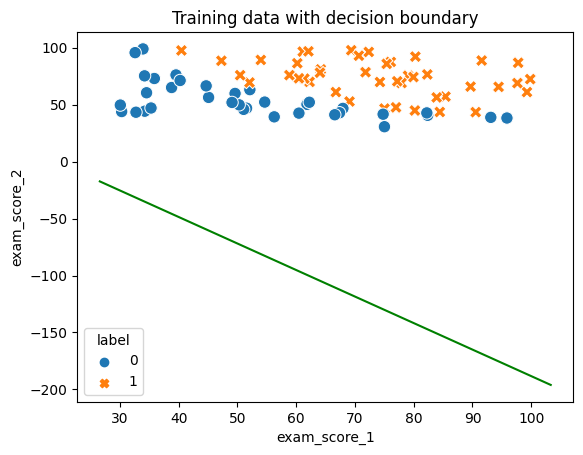

In [63]:
alpha=0.001
iterations=1000

print(initial_theta)


theta, J_history= gradient_descent(X, y, initial_theta, alpha, iterations)

print(theta)
print(J_history[999])


#theta=np.array([-25.16,0.2,0.2])
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df_train, style='label', s=80)
plt.title('Training data with decision boundary')

plot_x = np.array(ax.get_xlim())
plot_y = (-1/theta[2]*(theta[1]*plot_x + theta[0]))
plt.plot(plot_x, plot_y, '-', c="green")
plt.show(ax)



## **Step 6: Model testing: application to test set**

In [64]:
m_test=df_test.shape[0]
X_test = np.hstack((np.ones((m_test,1)), df_test.exam_score_1.values.reshape(-1,1),df_test.exam_score_2.values.reshape(-1,1)))
y_test = np.array(df_test.label.values).reshape(-1,1)

def predict(X, theta):
    y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
    return y_pred

y_pred= predict(X_test, theta)


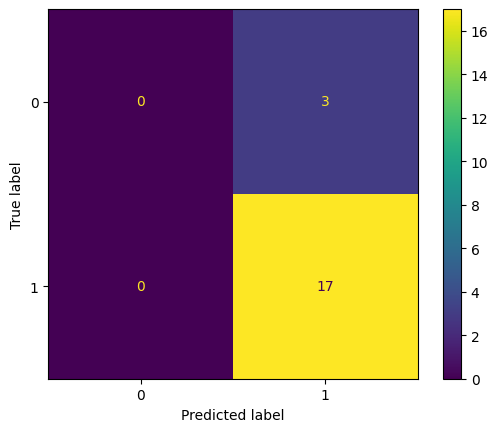

In [65]:
# performance metrics
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()



In [66]:
#metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
Sensitivity = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred,pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)

print({"Accuracy":Accuracy,"Sensitivity":Sensitivity,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.85, 'Sensitivity': 1.0, 'Specificity': 0.0, 'F1_score': 0.9189189189189189}


<ipython-input-55-ea3b0d504ff8>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-z))


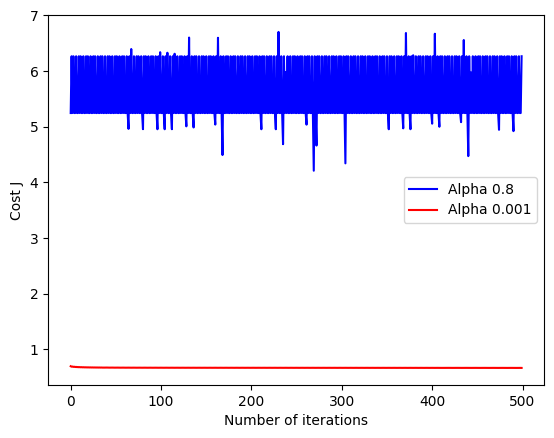

In [67]:
#alpha = [0.4, 0.1,0.05, 0.01, 0.001]
#colors = ['b','r','g','c','k']
num_iters = 500

alpha = [0.8, 0.001]
colors = ['b','r']
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(X.shape[1],1))
    theta, J_history = gradient_descent(X, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.legend()
plt.show()

In [68]:
initial_theta = np.zeros(shape=(X.shape[1],))

In [69]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis] #trick to make numpy minimize work
    h = sigmoid(X.dot(theta))
    J = (1/m) * (-y.T.dot(np.log(h)) - (1-y).T.dot(np.log(1-h)))

    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)

    return J, grad



import scipy.optimize as opt
def optimize_theta(X, y, initial_theta):
    opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',
                               jac=True, options={'maxiter':400})
    return opt_results['x'], opt_results['fun']


opt_theta, cost = optimize_theta(X, y, initial_theta)
print('Cost at theta found by fminunc:', cost)
print('theta:\n', opt_theta.reshape(-1,1))


Cost at theta found by fminunc: 0.2042738674466729
theta:
 [[-25.73896179]
 [  0.20851891]
 [  0.20354526]]


<ipython-input-69-ab6ccd6a46b9>:16: OptimizeWarning: Unknown solver options: maxiter
  opt_results = opt.minimize(cost_function, initial_theta, args=(X, y), method='TNC',


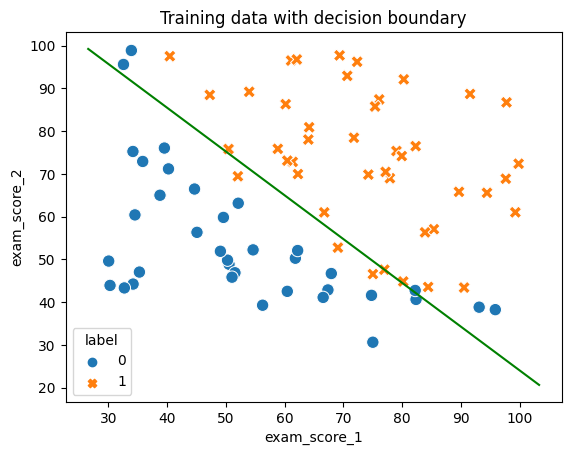

In [70]:
ax = sns.scatterplot(x='exam_score_1', y='exam_score_2', hue='label', data=df_train, style='label', s=80)
plt.title('Training data with decision boundary')

plot_x = np.array(ax.get_xlim())
plot_y = (-1/opt_theta[2]*(opt_theta[1]*plot_x + opt_theta[0]))
plt.plot(plot_x, plot_y, '-', c="green")
plt.show(ax)

In [71]:
y_pred_prob = predict(X_test, opt_theta)

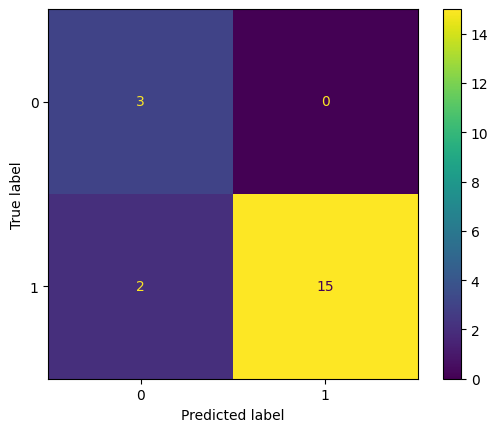

In [72]:
# performance metrics
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_prob)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [73]:
Accuracy = metrics.accuracy_score(y_test, y_pred_prob)
Sensitivity = metrics.recall_score(y_test, y_pred_prob)
Specificity = metrics.recall_score(y_test, y_pred_prob,pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred_prob)

print({"Accuracy":Accuracy,"Sensitivity":Sensitivity,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.9, 'Sensitivity': 0.8823529411764706, 'Specificity': 1.0, 'F1_score': 0.9375}
